In [1]:
import xarray as xr

In [2]:
#default_rcParams({'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.15, 'font.size': 12})
import matplotlib.pyplot as plt
import numpy as np
violet = [0.4940, 0.1840, 0.5560]
def plot_timeseries(exps=['unparameterized'], labels=None, colors=None, tmax=30000):
    plt.figure(figsize=(6,6), dpi=200)
    if labels is None:
        labels=exps
    if colors is None:
        colors = [None] * len(labels)
    for j, (exp, label) in enumerate(zip(exps, labels)):
        try:
            ds = xr.open_dataset(f'/scratch/pp2681/mom6/OM4_SIS2/{exp}/output/ocean.stats.nc', decode_times=False)
        except:
            ds = xr.open_dataset(f'/scratch/pp2681/mom6/OM4_SIS2/{exp}/ocean.stats.nc', decode_times=False)

        #ds['Time'] = ds['Time'].values.astype('timedelta64[D]')
        ds['Time'] = ds['Time'] - ds['Time'][0]
        kw = {'lw':2, 'color':colors[j]}
        # plt.subplot(2,1,1)
        # ds.max_CFL_lin.plot(**kw)
        # plt.xlabel('Days')
        # plt.grid()
        # plt.ylim([0,0.2])

        plt.subplot(2,1,1)
        (ds.KE.sum('Layer')).plot(**kw)
        plt.xlabel('Years')
        plt.xticks(np.arange(6)*365,np.arange(6))
        plt.grid()
        plt.ylabel('Kinetic energy, Joules')
        plt.ylim([0,6e+18])

        plt.subplot(2,1,2)
        (ds.APE.sum('Interface')).plot(label=label, **kw)
        plt.xlabel('Years')
        plt.xticks(np.arange(6)*365,np.arange(6))
        plt.grid()
        plt.ylabel('Available potential energy, Joules')
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1,1))

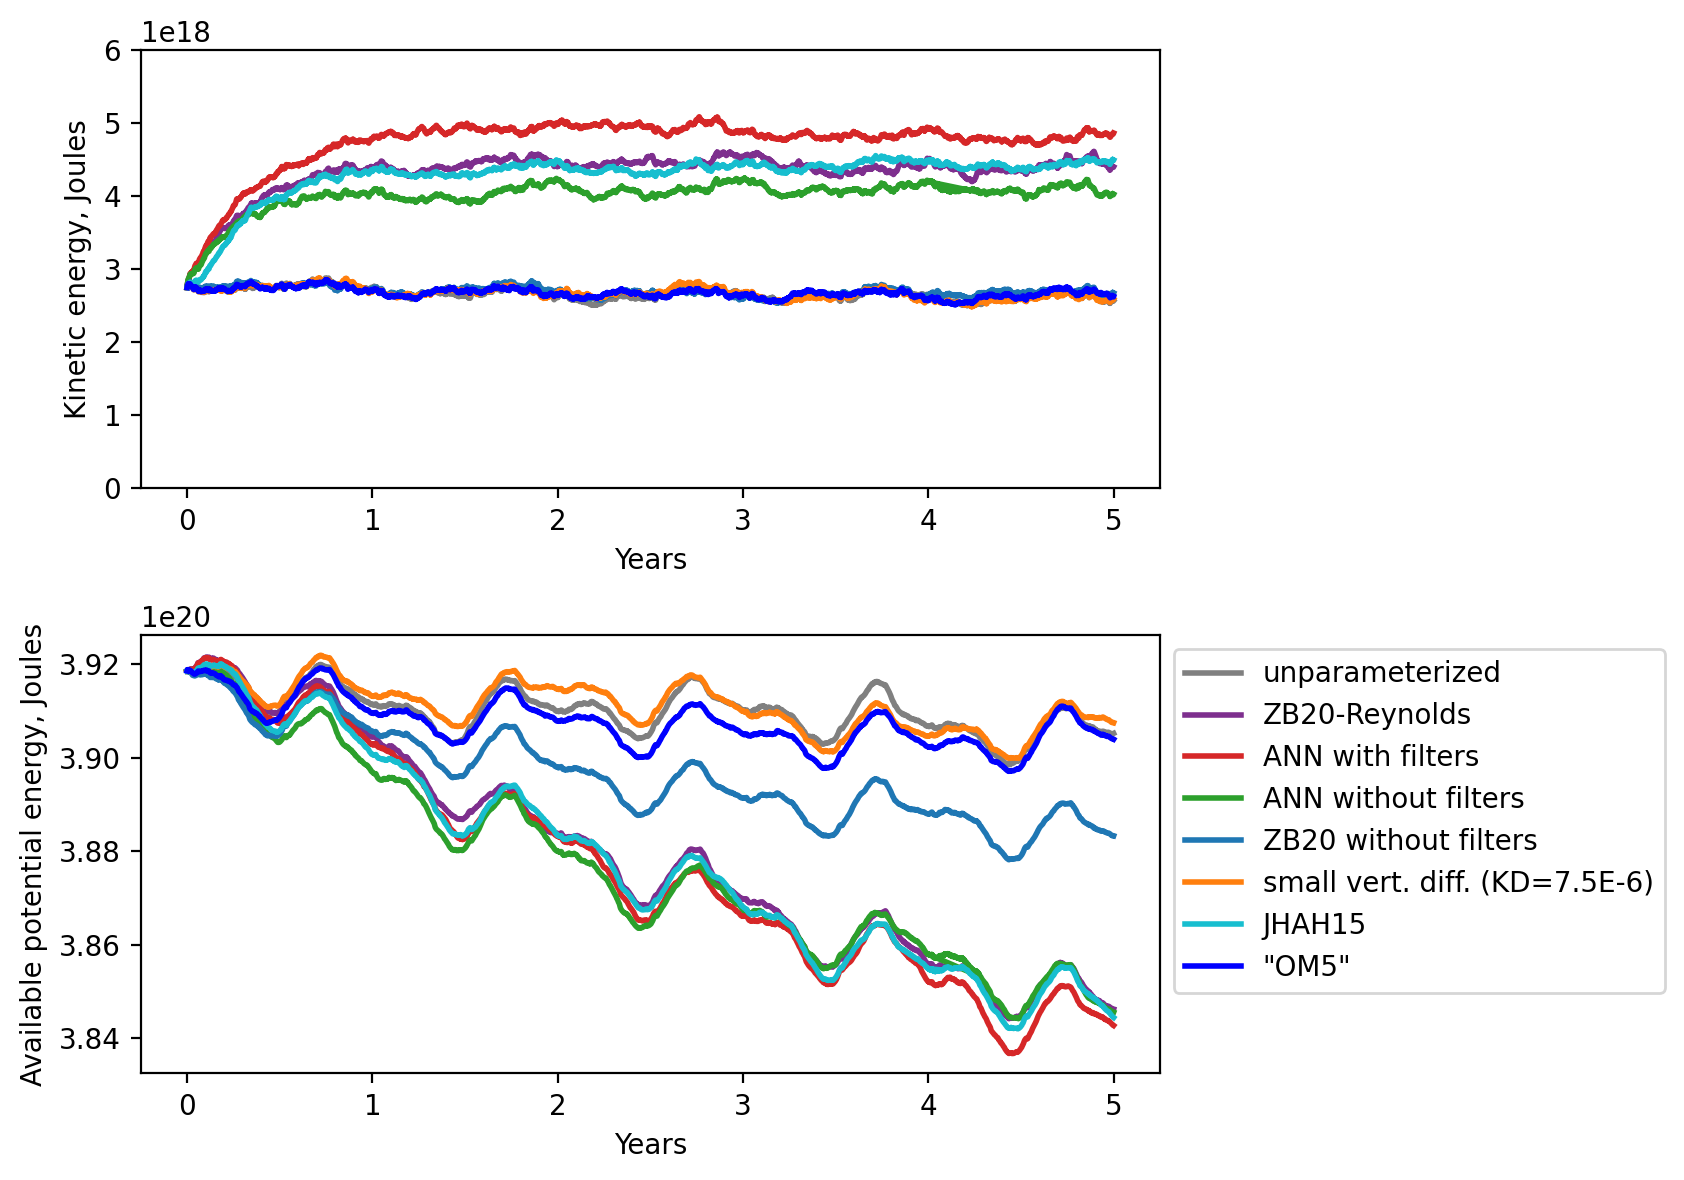

In [10]:
plot_timeseries(['unparameterized', 'ZB20-Reynolds', 'ANN-redline', 'ANN-greenline', 'ZB20-Klower', 'vert-diff', 'JHAH15', 'unparameterized-OM5'], 
                labels=['unparameterized', 'ZB20-Reynolds', 'ANN with filters', 'ANN without filters', 'ZB20 without filters', 
                        'small vert. diff. (KD=7.5E-6)', 'JHAH15', '"OM5"'],
                colors=['gray', violet, 'tab:red', 'tab:green', 'tab:blue', 'tab:orange', 'tab:cyan', 'b'])

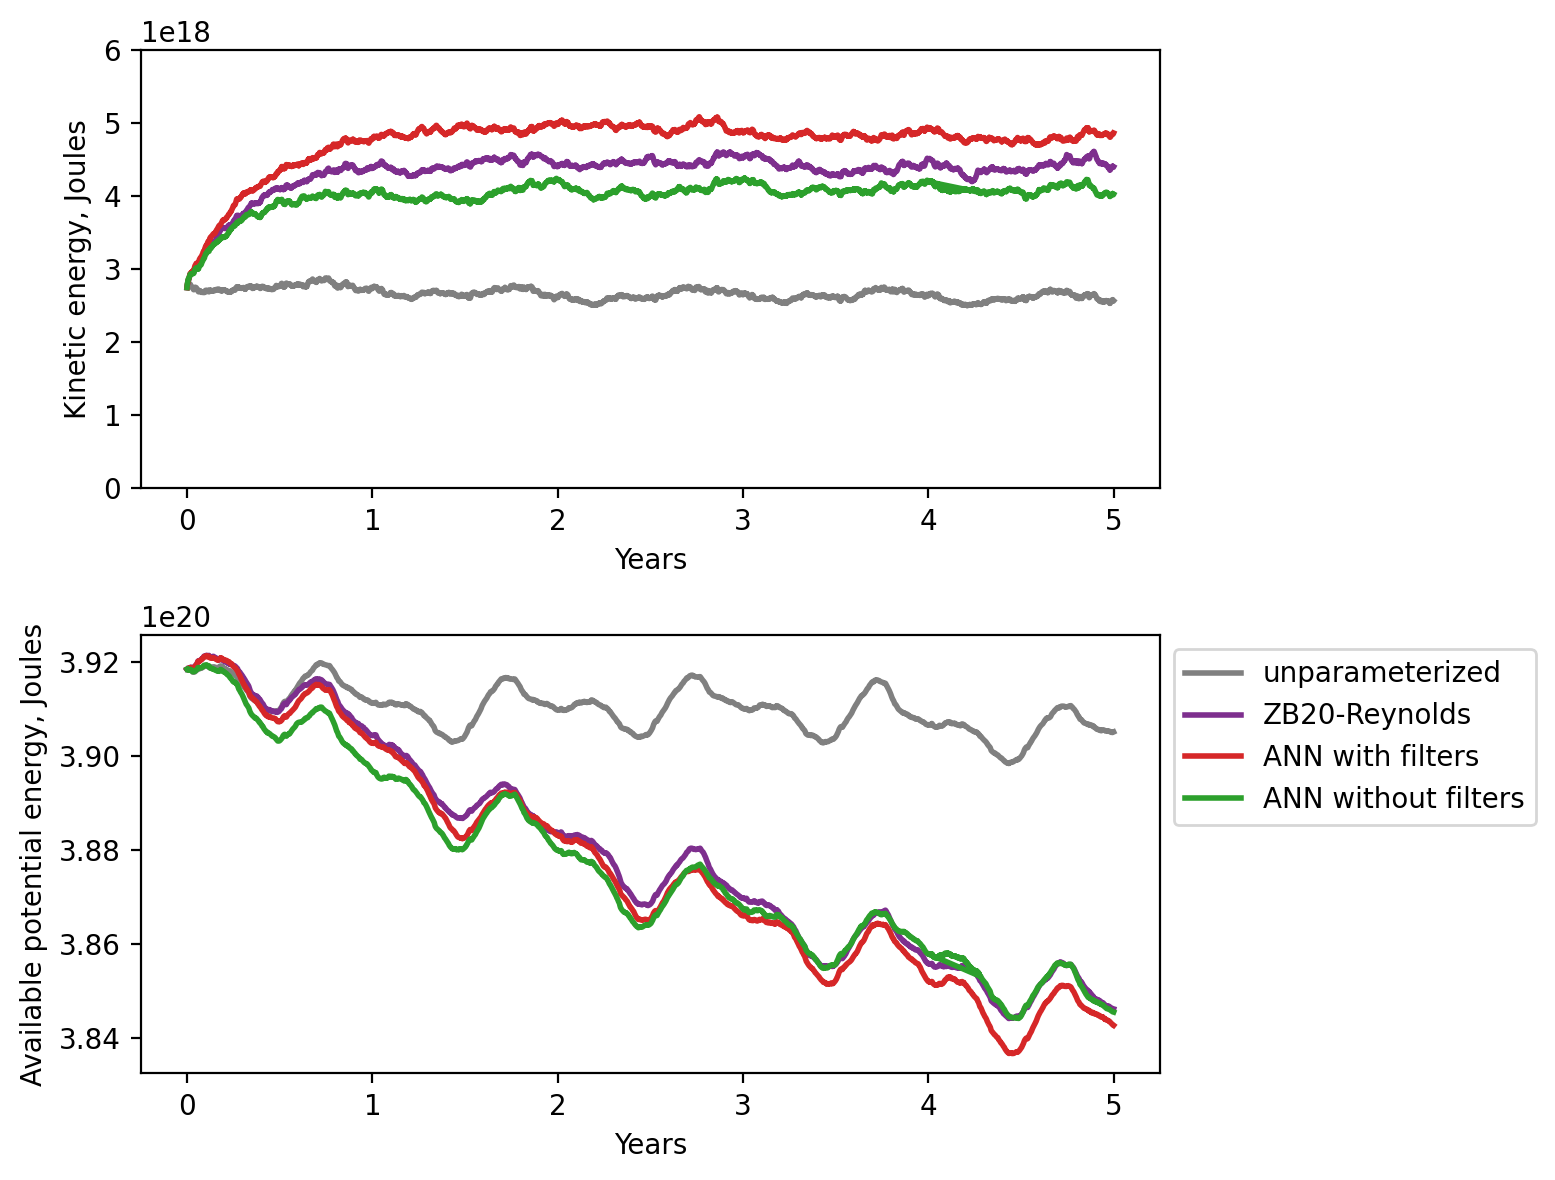

In [5]:
plot_timeseries(['unparameterized', 'ZB20-Reynolds', 'ANN-redline', 'ANN-greenline', ''], 
                labels=['unparameterized', 'ZB20-Reynolds', 'ANN with filters', 'ANN without filters'],
                colors=['gray', violet, 'tab:red', 'tab:green'])

In [9]:
#default_rcParams({'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.15, 'font.size': 12})
import matplotlib.pyplot as plt
import numpy as np
violet = [0.4940, 0.1840, 0.5560]
def plot_timeseries(exps=['unparameterized'], labels=None, colors=None, zorders=None, tmax=30000):
    plt.figure(figsize=(6,9), dpi=200)
    if labels is None:
        labels=exps
    if colors is None:
        colors = [None] * len(labels)
    for j, (exp, label, zorder) in enumerate(zip(exps, labels, zorders)):
        try:
            ds = xr.open_dataset(f'/scratch/pp2681/mom6/OM4_SIS2/{exp}/output/ocean.stats.nc', decode_times=False)
        except:
            ds = xr.open_dataset(f'/scratch/pp2681/mom6/OM4_SIS2/{exp}/ocean.stats.nc', decode_times=False)

        #ds['Time'] = ds['Time'].values.astype('timedelta64[D]')
        ds['Time'] = ds['Time'] - ds['Time'][0]
        kw = {'lw':1, 'color':colors[j], 'zorder': zorders[j]}
        plt.subplot(3,1,1)
        ds.max_CFL_lin.plot(**kw)
        plt.xlabel('Days')
        plt.grid()
        plt.ylim([0,0.5])

        plt.subplot(3,1,2)
        (ds.KE.sum('Layer')).plot(**kw)
        plt.xlabel('Years')
        plt.xticks(np.arange(6)*365,np.arange(6))
        plt.grid()
        plt.ylabel('Kinetic energy, Joules')
        plt.ylim([0,6e+18])

        plt.subplot(3,1,3)
        (ds.APE.sum('Interface')).plot(label=label, **kw)
        plt.xlabel('Years')
        plt.xticks(np.arange(6)*365,np.arange(6))
        plt.grid()
        plt.ylabel('Available potential energy, Joules')
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1,1))

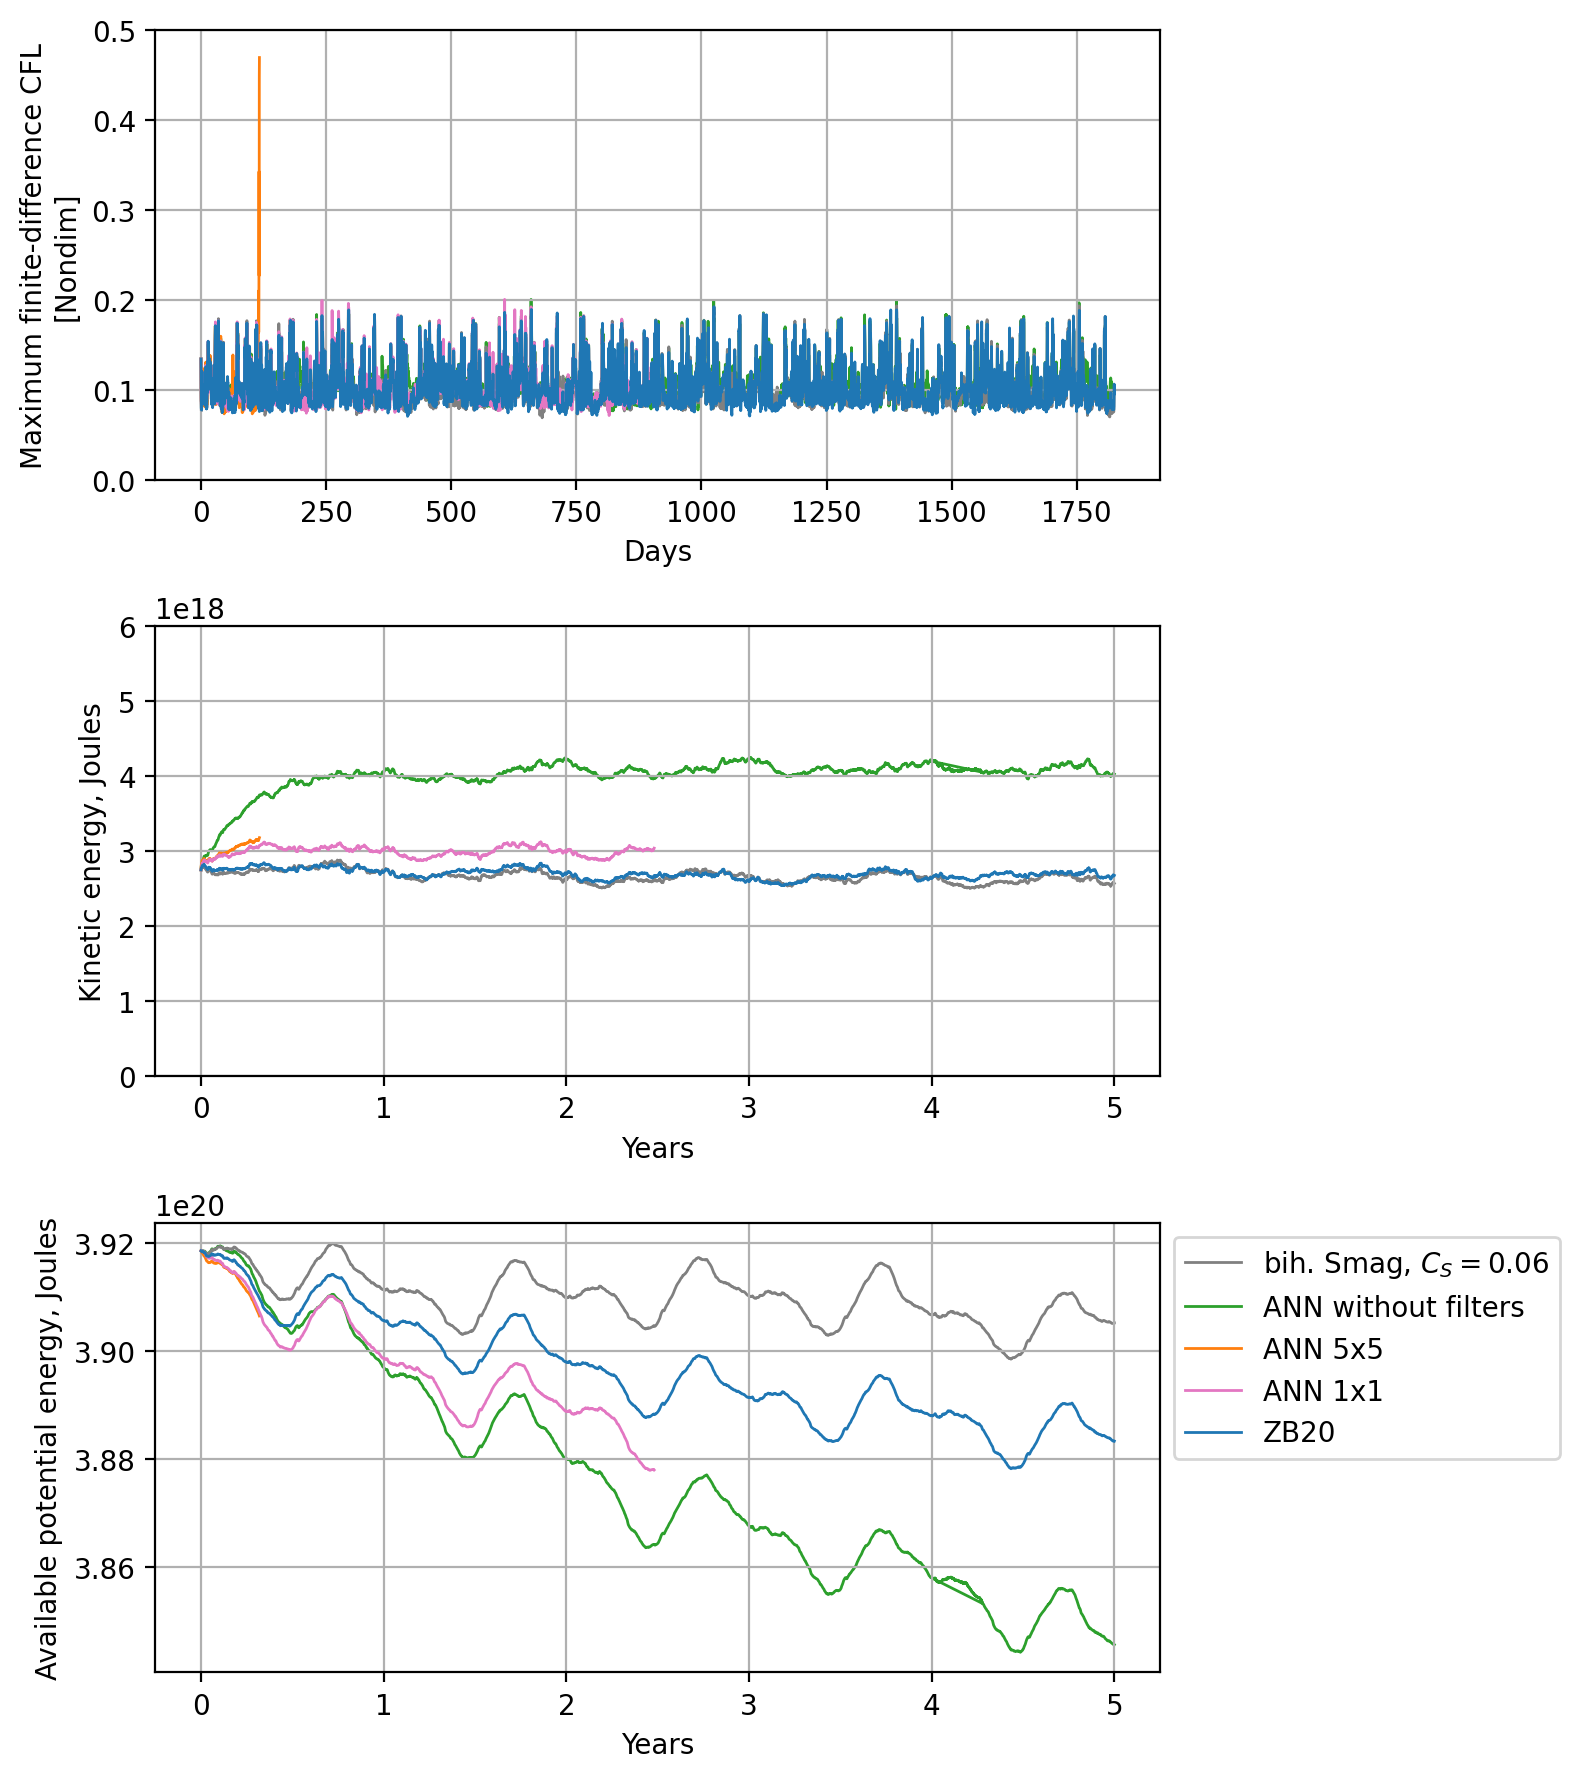

In [14]:
plot_timeseries(['unparameterized', 'ANN-greenline', 'ANN-5x5', 'ANN-1x1', 'ZB20-Klower'], 
                labels=['bih. Smag, $C_S=0.06$', 'ANN without filters', 'ANN 5x5', 'ANN 1x1', 'ZB20'],
                colors=['gray', 'tab:green', 'tab:orange', 'tab:pink', 'tab:blue'], zorders=[1,0,2,3,4])

In [44]:
#Vorticity is ok? 
ds_FGR2 = xr.open_mfdataset('/scratch/pp2681/mom6/CM26_Double_Gyre/generalization/May22-FGR2-subfilter-EXP1-R4/ZB-1.0-Cs-0.06/output/prog*')
ds_FGR3 = xr.open_mfdataset('/scratch/pp2681/mom6/CM26_Double_Gyre/generalization/May22-FGR3-subfilter-EXP1-R4/ZB-1.0-Cs-0.06/output/prog*')
ds_FGR4 = xr.open_mfdataset('/scratch/pp2681/mom6/CM26_Double_Gyre/generalization/May22-FGR4-subfilter-EXP1-R4/ZB-1.0-Cs-0.06/output/prog*')

Text(0.5, 1.0, 'FGR 4')

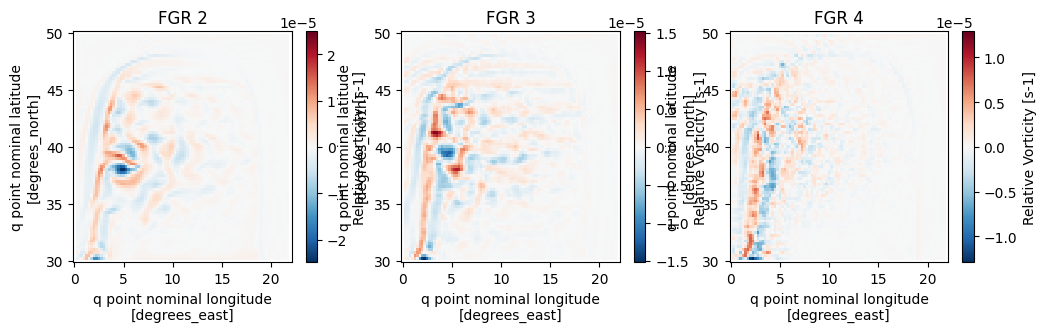

In [47]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
ds_FGR2.RV.isel(Time=-1,zl=0).plot()
plt.title('FGR 2')

plt.subplot(1,3,2)
ds_FGR3.RV.isel(Time=-1,zl=0).plot()
plt.title('FGR 3')

plt.subplot(1,3,3)
ds_FGR4.RV.isel(Time=-1,zl=0).plot()
plt.title('FGR 4')

In [3]:
#default_rcParams({'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.15, 'font.size': 12})
import matplotlib.pyplot as plt
import numpy as np
violet = [0.4940, 0.1840, 0.5560]
def plot_timeseries(exps=['unparameterized'], labels=None, colors=None, tmax=30000):
    plt.figure(figsize=(6,9), dpi=200)
    if labels is None:
        labels=exps
    if colors is None:
        colors = [None] * len(labels)
    for j, (exp, label) in enumerate(zip(exps, labels)):
        try:
            ds = xr.open_dataset(f'/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/{exp}/output/ocean.stats.nc', decode_times=False)
        except:
            ds = xr.open_dataset(f'/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/{exp}/ocean.stats.nc', decode_times=False)

        #ds['Time'] = ds['Time'].values.astype('timedelta64[D]')
        ds['Time'] = ds['Time'] - ds['Time'][0]
        kw = {'lw':2, 'color':colors[j]}
        plt.subplot(3,1,1)
        ds.max_CFL_lin.plot(**kw)
        plt.xlabel('Days')
        plt.grid()
        plt.ylim([0,0.5])

        plt.subplot(3,1,2)
        (ds.KE.sum('Layer')).plot(**kw)
        plt.xlabel('Years')
        plt.xticks(np.arange(6)*365,np.arange(6))
        plt.grid()
        plt.ylabel('Kinetic energy, Joules')
        plt.ylim([0,6e+18])

        plt.subplot(3,1,3)
        (ds.APE.sum('Interface')).plot(label=label, **kw)
        plt.xlabel('Years')
        plt.xticks(np.arange(6)*365,np.arange(6))
        plt.grid()
        plt.ylabel('Available potential energy, Joules')
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1,1))

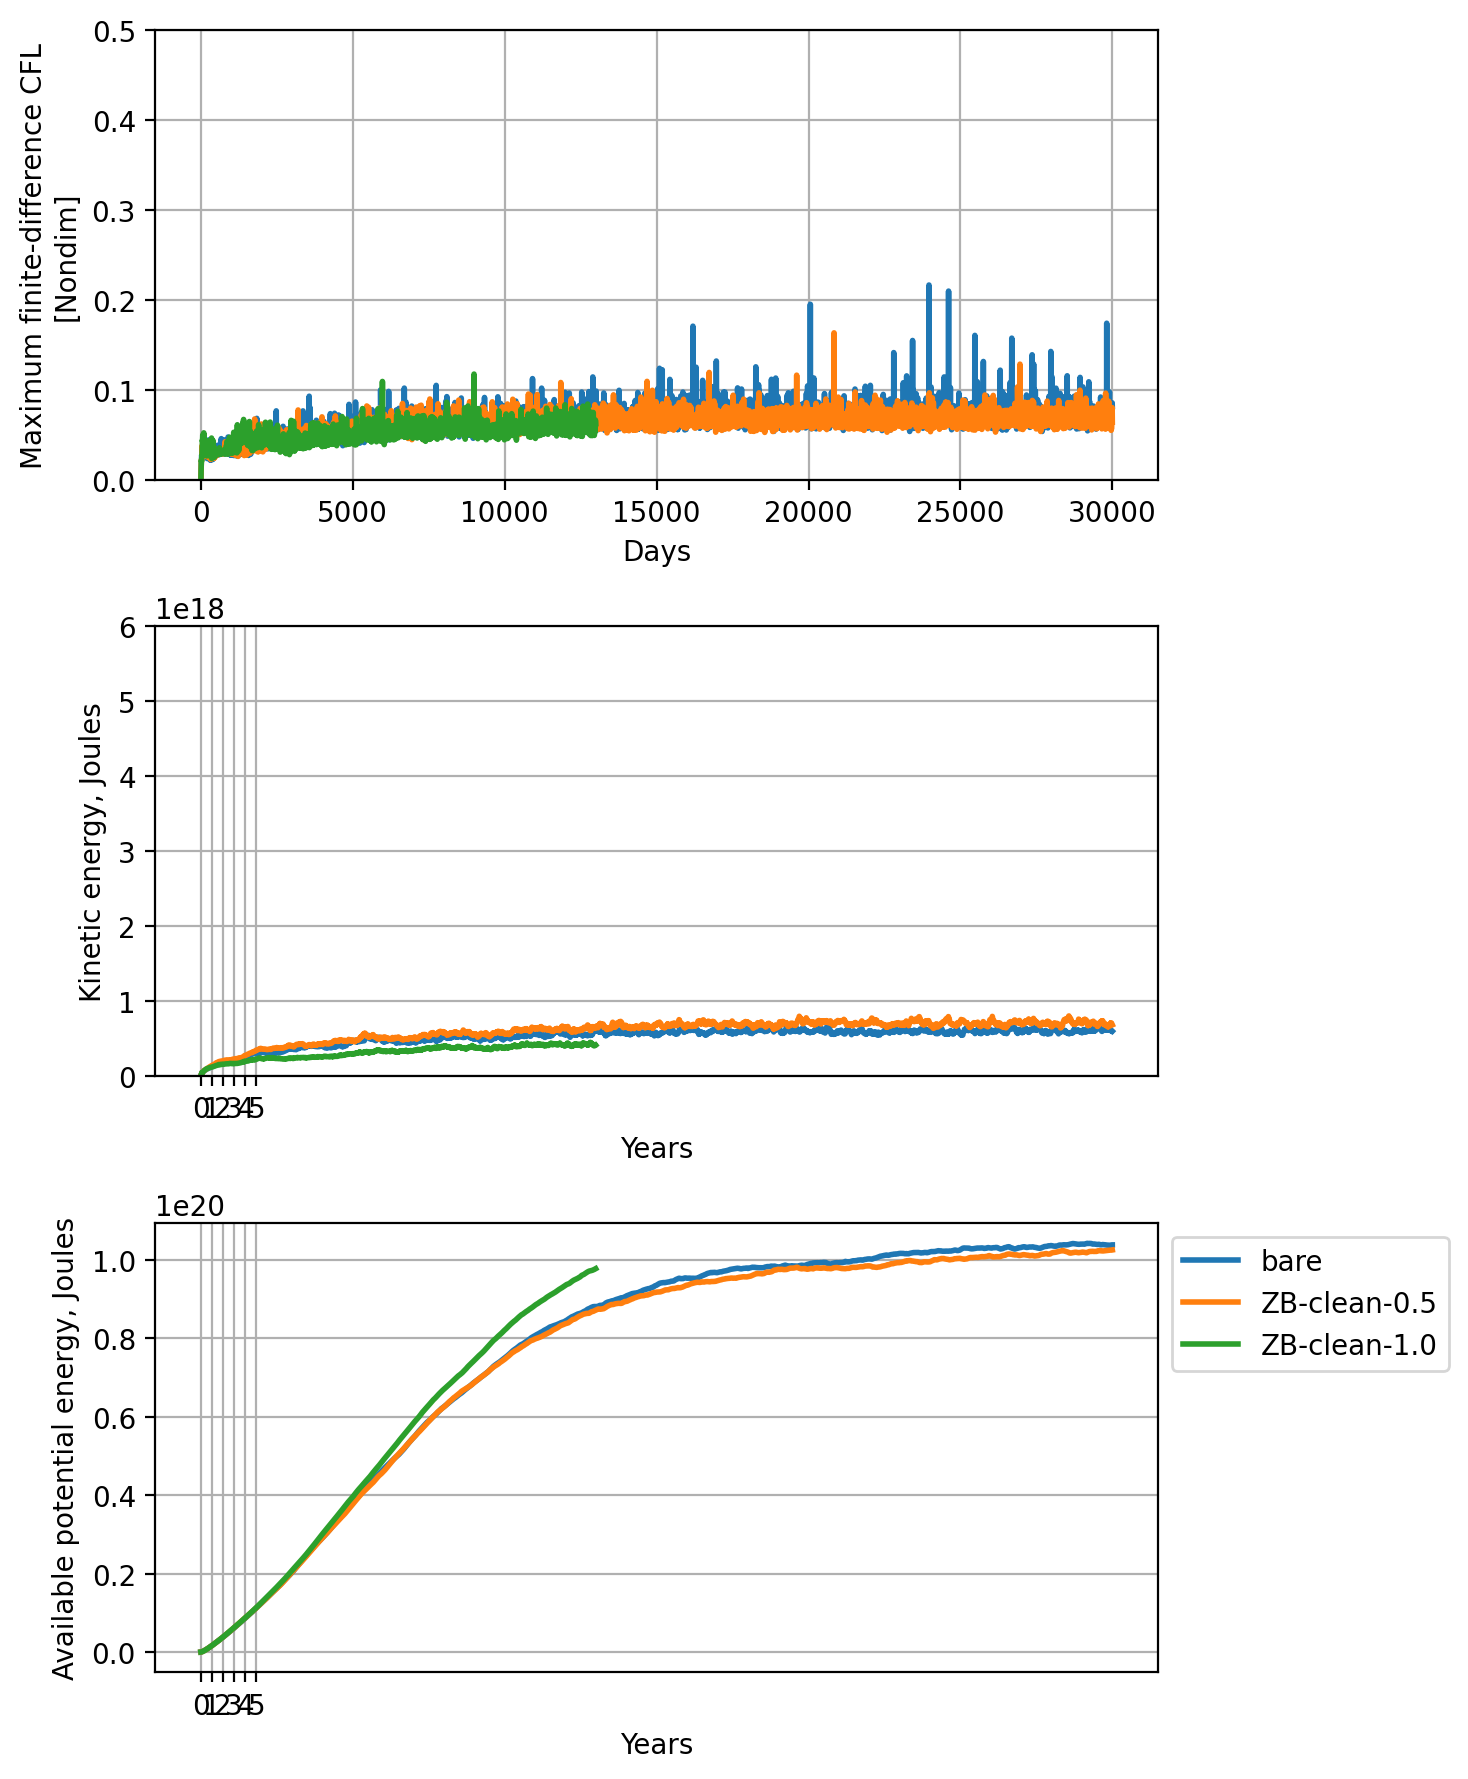

In [5]:
plot_timeseries(['bare', 'ZB-clean-0.5', 'ZB-clean-1.0'])